**About : This project help HR teams in companies find the right people for Big Data jobs. It looks at lots of job postings online and figures out what kinds of Big Data jobs there are, which skills are most important, and how good people need to be at those skills.**

In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import re

In [ ]:
DATA_FILE_URL = 'https://raw.githubusercontent.com/rudrapatirohith/Pds_Project/main/Pds_Project/Raw_Data/data_science_job.csv'

In [ ]:
#Loading the Data
data = pd.read_csv(DATA_FILE_URL,encoding='latin-1')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [ ]:
data.columns

Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities'],
      dtype='object')

In [ ]:
columns = [each.strip().replace(' ', '_').lower() for each in data.columns]
columns

['company',
 'job_title',
 'location',
 'job_type',
 'experience_level',
 'salary',
 'requirment_of_the_company',
 'facilities']

In [ ]:
data.columns = columns

In [ ]:
#Checking the Lenght of the Dataframe called Data
len(data)

3198

**DATA PRE-PROCESSING**

In [ ]:
#Checking the number of missing values(Nan or null values) in each column of the dataframe called Data.
data.isna().sum()

company                        1
job_title                      1
location                       1
job_type                       1
experience_level             236
salary                       189
requirment_of_the_company      0
facilities                     0
dtype: int64

In [ ]:
#Filling missing values
data['company']=data['company'].fillna('Publicis Groupe')
data['job_title']=data['job_title'].fillna('Data Engineer')
data['location']=data['location'].fillna('Bengaluru, India')
data['job_type']=data['job_type'].fillna('Full Time')
data['requirment_of_the_company']=data['requirment_of_the_company'].fillna('Big Data,Business Intelligence,Data analysis,EDA,Excel,Machine Learning')

In [ ]:
#extracting the numeric part from the 'Salary' column, converting it to a
#float, and adjusting the scale by multiplying by 1000.
data['salary']=data['salary'].str.extract(r'(\d+)')
data['salary']=data['salary'].astype(float)*1000

In [ ]:
#Checking the changes made by printing the first 5 rows of Dataframe Data.
data.head()

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [ ]:
#Checking Summary of the Dataframe Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    3198 non-null   object 
 1   job_title                  3198 non-null   object 
 2   location                   3198 non-null   object 
 3   job_type                   3198 non-null   object 
 4   experience_level           2962 non-null   object 
 5   salary                     3009 non-null   float64
 6   requirment_of_the_company  3198 non-null   object 
 7   facilities                 3198 non-null   object 
dtypes: float64(1), object(7)
memory usage: 200.0+ KB


In [ ]:
data.isna().sum()

company                        0
job_title                      0
location                       0
job_type                       0
experience_level             236
salary                       189
requirment_of_the_company      0
facilities                     0
dtype: int64

In [ ]:
pattern = r'\bdata\b'
filtered_data = data[data['job_title'].str.contains(pattern, case=False)]
filtered_data.head()

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",",,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
5,ServiceNow,Sr Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184000.0,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive..."


In [ ]:
len(filtered_data)

2119

In [ ]:
filtered_data['job_title'] = filtered_data['job_title'].str.replace('Analytics', 'Analyst')

<ipython-input-217-74f25a815c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['job_title'] = filtered_data['job_title'].str.replace('Analytics', 'Analyst')


In [ ]:
def extract_job_role(job_title):
    patterns = [
        r"big\sdata",
        r"data\sanalyst",
        r"data\sscientist",
        r"data\sscience",
        r'data\sengineer',
        r"data\sarchitect",
        r"data\smanager"
    ]
    job_title = job_title.replace('Developer', 'Engineer')
    job_title = job_title.replace('Analyse', 'Analyst')
    # Check for matches
    for pattern in patterns:
        if re.search(pattern, job_title, re.IGNORECASE):
            return re.sub(r"\s", " ", re.search(pattern, job_title, re.IGNORECASE).group().strip())
    return None

In [ ]:
filtered_data['role'] = filtered_data['job_title'].apply(extract_job_role)
filtered_data.isna().sum()

<ipython-input-219-9c132e7e2611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['role'] = filtered_data['job_title'].apply(extract_job_role)


company                        0
job_title                      0
location                       0
job_type                       0
experience_level             163
salary                       114
requirment_of_the_company      0
facilities                     0
role                         309
dtype: int64

In [ ]:
no_job_role = filtered_data[filtered_data['role'].isna()]

In [ ]:
filtered_data['role'] = filtered_data['role'].apply(lambda x: x.lower() if x is not None else x)

<ipython-input-221-c9d5156b76e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['role'] = filtered_data['role'].apply(lambda x: x.lower() if x is not None else x)


In [ ]:
filtered_data['role'] = filtered_data['role'].apply(lambda x: x.replace('science', 'scientist') if x is not None else x)

<ipython-input-222-249a4d54da87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['role'] = filtered_data['role'].apply(lambda x: x.replace('science', 'scientist') if x is not None else x)


In [ ]:
filtered_data['role'].unique()

array(['data analyst', 'data engineer', 'data scientist', None,
       'data manager', 'data architect', 'big data'], dtype=object)

In [ ]:
no_job_role['job_title'] = no_job_role['job_title'].apply(lambda x: x.replace('(', ' '))
no_job_role['job_title'] = no_job_role['job_title'].apply(lambda x: x.replace(')', ' '))

<ipython-input-224-c30317f04c86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_job_role['job_title'] = no_job_role['job_title'].apply(lambda x: x.replace('(', ' '))
<ipython-input-224-c30317f04c86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_job_role['job_title'] = no_job_role['job_title'].apply(lambda x: x.replace(')', ' '))


In [ ]:
no_job_role['job_title'].groupby(no_job_role['job_title']).count().sort_values(ascending=False)

job_title
Talan Consulting  Consultant Senior/Manager  Data Strategy  H/F     5
Data Product Manager                                                  4
Data Specialist - Governance                                          4
Staff Engineer, Data Platform                                         3
Data Product Owner                                                    3
                                                                     ..
ETL and Data Warehouse Testing Intern                                 1
Engineering Team Lead, Data Modelling                                 1
Expert Cloud Data  F/H                                                1
FAIR Data Lead                                                        1
[Job- 10566] Senior Data Visualization Analyst, Brazil                1
Name: job_title, Length: 253, dtype: int64

In [ ]:
def extract_none_job_role(job_title):
    # job_title = job_title.replace()
    if job_title is not None:
        a = job_title.replace('data', 'Data').split(' ')
        if 'Data' in a:
            print(a[a.index('Data'):a.index('Data')+2])
            # return a[a.index('Data')-1:a.index('Data')+2]
    # return None

In [ ]:
#no_job_role['role'] =
no_job_role['job_title'].apply(extract_none_job_role)

['Data', 'Quality']
['Data', 'Management']
['Data', 'Management']
['Data', 'Project']
['Data', 'Pipeline']
['Data', 'Modeler']
['Data', 'Management']
['Data', 'Product']
['Data', 'Visualization']
['Data', 'Quality']
['Data', 'Management']
['Data', 'Platform']
['Data', 'Platform']
['Data', 'Product']
['Data', 'Pipeline']
['Data', 'Strategy']
['Data', 'Visualization']
['Data', 'Quality']
['Data', 'Team']
['Data', 'Operations']
['Data', 'Operations']
['Data', 'Visualization']
['Data', 'Management']
['Data', 'Operations']
['Data', 'Management']
['Data', 'Platform']
['Data', 'operator']
['Data', 'Integrations']
['Data', 'Strategy']
['Data', 'Analysis']
['Data', 'Modeler']
['Data', 'Specialist']
['Data', 'Strategist']
['Data', 'Quality']
['Data', 'Strategist']
['Data', 'Quality']
['Data', 'Management']
['Data', 'Operations']
['Data', 'Management']
['Data', 'analytics']
['Data', 'Systems']
['Data', 'Infrastructure']
['Data', 'Reporter']
['Data', 'and']
['Data', 'Specialist']
['Data', 'analyse

6       None
13      None
22      None
31      None
34      None
        ... 
3139    None
3151    None
3163    None
3180    None
3187    None
Name: job_title, Length: 309, dtype: object

In [ ]:
filtered_data['role'] = filtered_data['role'].apply(lambda x: 'big data engineer' if x is not None and x == 'big data' else x)

<ipython-input-228-9696832b34b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['role'] = filtered_data['role'].apply(lambda x: 'big data engineer' if x is not None and x == 'big data' else x)


In [ ]:
filtered_data['role'] = filtered_data['role'].apply(lambda x: 'other' if x is None else x)

<ipython-input-229-fda1041bc0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['role'] = filtered_data['role'].apply(lambda x: 'other' if x is None else x)


In [ ]:
filtered_data

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities,role
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",",,,,",data analyst
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,",data analyst
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi...",data engineer
5,ServiceNow,Sr Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184000.0,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive...",data scientist
...,...,...,...,...,...,...,...,...,...
3191,Publicis Groupe,"Associate Director, Data Science","New York City, United States",Full Time,Mid-level,106000.0,"Bayesian,Classification,Clustering,Data analys...","Career development,Health care,,,",data scientist
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39000.0,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,",data scientist
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92000.0,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,",data analyst
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39000.0,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,",data scientist


In [ ]:
filtered_data.to_csv('cleaned_dataset.csv', index=False)

**TASK1: Identify various Big Data job families in the given dataset.**

In [ ]:
filtered_data = pd.read_csv('cleaned_dataset.csv')

In [ ]:
filtered_data['role'].unique()

array(['data analyst', 'data engineer', 'data scientist', 'other',
       'data manager', 'data architect', 'big data engineer'],
      dtype=object)

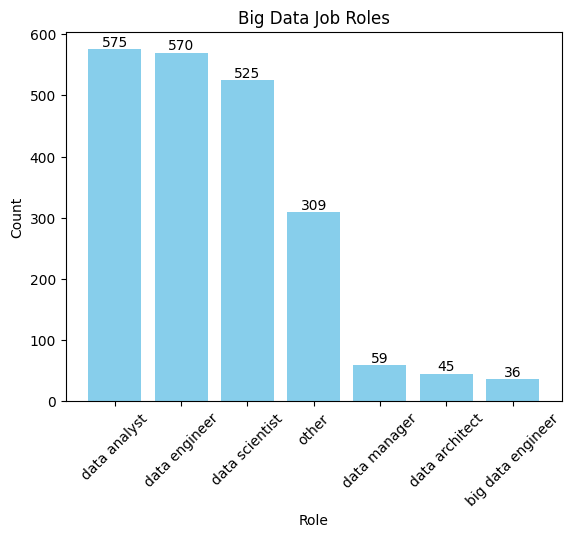

In [ ]:

roles = list(filtered_data['role'].unique())
counts = list(filtered_data['role'].value_counts())

# Choose a color for each bar
colors='skyblue'
plt.bar(roles, counts,color=colors)
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Big Data Job Roles')
plt.xticks(rotation=45)

# Add count values on top of each bar
for i, count in enumerate(counts):
    plt.text(roles[i], count, str(count), ha='center', va='bottom')

plt.show()


**TASK2: Identify homogeneous groups of Big Data skills that are highly valued by companies**

In [ ]:
filtered_data['req'] = filtered_data['requirment_of_the_company'].str.split(',')

In [ ]:
filtered_data['req']

0       [Computer Science, Data quality, Genetics, Mat...
1         [Agile, Data management, Finance, Security, , ]
2       [Engineering, Industrial, Oracle, Power BI, R,...
3       [AWS, Azure, Computer Science, Consulting, Dat...
4       [Computer Science, Deep Learning, Industrial, ...
                              ...                        
2114    [Bayesian, Classification, Clustering, Data an...
2115    [APIs, Clustering, Computer Science, Data visu...
2116    [AWS, Big Data, Computer Science, GCP, Snowfla...
2117    [Computer Science, Data Analytics, Data Mining...
2118    [Airflow, Architecture, BigQuery, CI/CD, Compu...
Name: req, Length: 2119, dtype: object

In [ ]:
#transform each element of a list-like object into a separate row, replicating the index values.
filtered_data_exploded = filtered_data.explode('req')

In [ ]:
#displaying the filtered_data_exploded
filtered_data_exploded

,company,job_title,location,job_type,experience_level,salary,requirment_of_the_company,facilities,role,req
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst,Computer Science
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst,Data quality
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst,Genetics
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst,Mathematics
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,",data analyst,SAS
...,...,...,...,...,...,...,...,...,...,...
2118,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115000.0,"Airflow,Architecture,BigQuery,CI/CD,Computer S...",",,,,",data engineer,Architecture
2118,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115000.0,"Airflow,Architecture,BigQuery,CI/CD,Computer S...",",,,,",data engineer,BigQuery
2118,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115000.0,"Airflow,Architecture,BigQuery,CI/CD,Computer S...",",,,,",data engineer,CI/CD
2118,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115000.0,"Airflow,Architecture,BigQuery,CI/CD,Computer S...",",,,,",data engineer,Computer Science


In [ ]:
# Displaying Data types
filtered_data_exploded.dtypes

company                       object
job_title                     object
location                      object
job_type                      object
experience_level              object
salary                       float64
requirment_of_the_company     object
facilities                    object
role                          object
req                           object
dtype: object

In [ ]:
# convert all the text in the 'req' column of the DataFrame 'filtered_data_exploded' to lowercase.
filtered_data_exploded['req'] = filtered_data_exploded['req'].str.lower()

In [ ]:
#  clean the data by eliminating rows with these specific values from the DataFrame
# inplace=True parameter means that the changes are made directly to the original DataFrame, and it does not return a new DataFrame.
filtered_data_exploded.drop(filtered_data_exploded[filtered_data_exploded['req'].isin(['', 'computer science', 'engineering'])].index, inplace=True)

In [ ]:
filtered_data_exploded['req'].value_counts().head(20)

aws                      316
architecture             295
big data                 250
agile                    214
azure                    209
data analysis            169
apis                     144
data analytics           134
airflow                  133
business intelligence    126
consulting               116
excel                    110
python                   102
data management          101
data visualization        99
data pipelines            97
bigquery                  94
data quality              90
machine learning          85
ci/cd                     77
Name: req, dtype: int64

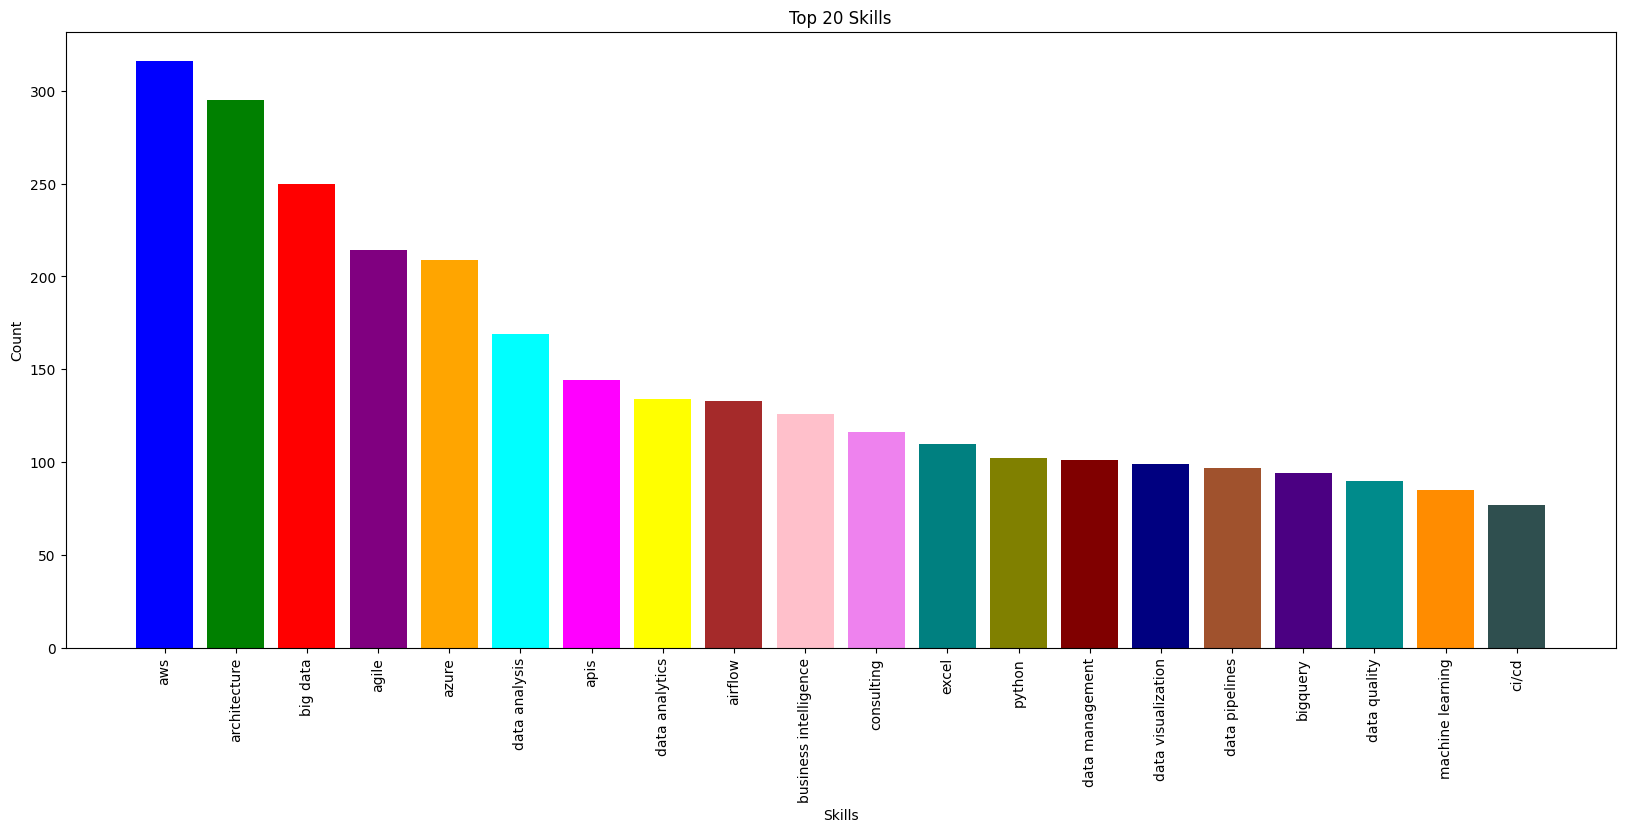

In [ ]:

#extracts the skill names and creates a list.
skills = list(filtered_data_exploded['req'].value_counts().head(20).index)

# extracts the corresponding frequency counts and creates a list.
values = list(filtered_data_exploded['req'].value_counts().head(20).values)

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'violet', 'teal', 'olive', 'maroon', 'navy', 'sienna', 'indigo', 'darkcyan', 'darkorange', 'darkslategray']


## Increase the width of the visualization by adjusting figsize
plt.figure(figsize=(20, 8))

plt.bar(skills, values, color=colors)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 20 Skills')

#Rotates the x-axis labels by 90 degrees for better readability, especially when there are many skills.
plt.xticks(rotation=90)

plt.show()



**KMeans clustering is applied to group similar skills into clusters.**

**The clusters are visualized using a scatter plot.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


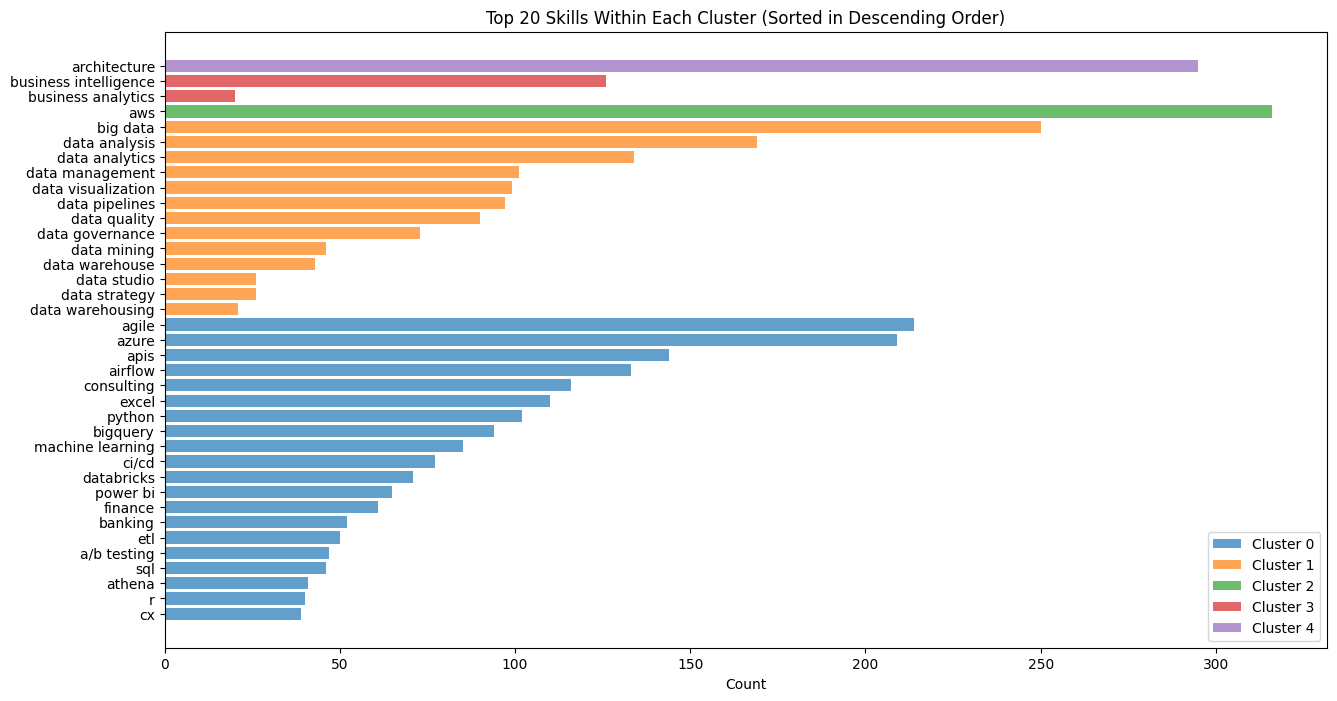

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (you can adjust this based on your data)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Add cluster labels to the DataFrame
filtered_data_exploded['cluster'] = kmeans.labels_

# Get the top 20 skills within each cluster and sort them in descending order
top_skills_per_cluster = {}
for i in range(num_clusters):
    cluster_data = filtered_data_exploded[filtered_data_exploded['cluster'] == i]
    cluster_skills = cluster_data['req'].value_counts().head(20).sort_values(ascending=True)
    top_skills_per_cluster[f'Cluster {i}'] = cluster_skills

# Visualize the top 20 skills within each cluster
plt.figure(figsize=(15, 8))
for cluster, skills in top_skills_per_cluster.items():
    plt.barh(skills.index, skills.values, label=cluster, alpha=0.7)


plt.xlabel('Count')
plt.title('Top 20 Skills Within Each Cluster (Sorted in Descending Order)')
plt.legend()
plt.show()


**TASK3: Characterize each Big Data job family according to the level of competence required for each Big Data skill set**

In [ ]:
no_of_skills = 7

In [ ]:
d = filtered_data_exploded.groupby('role')['req'].apply(lambda x: x.value_counts().head(no_of_skills))

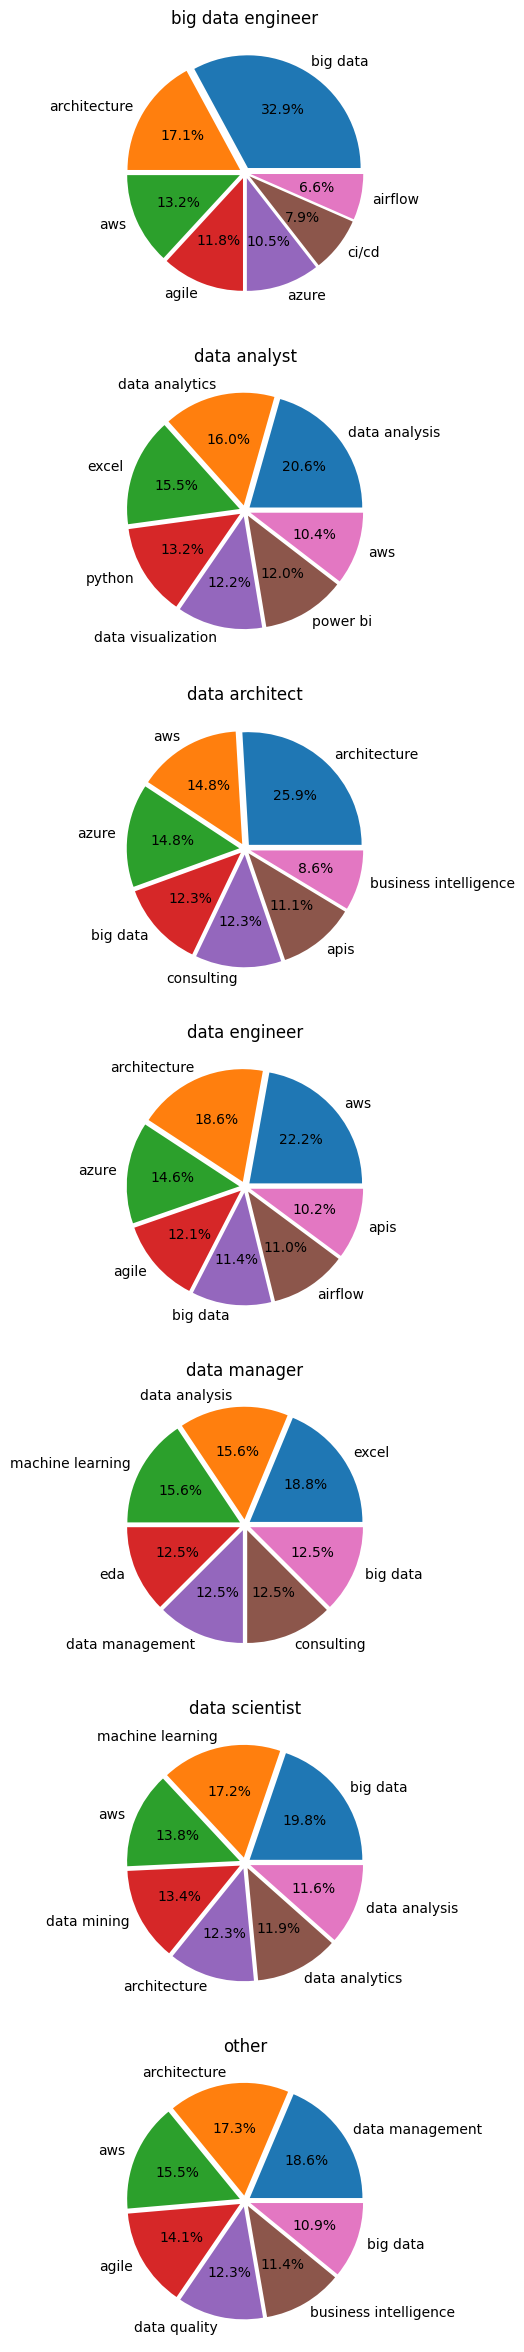

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(7, 1, figsize=(7, 30))
f = 0
for role, counts in d.groupby(level=0):
    axs[f].pie(list(counts.values), labels=list(map(lambda x: x[1], list(counts.index))), autopct='%1.1f%%', explode=[0.05]*no_of_skills)
    axs[f].set_title(role)
    f += 1
plt.show()